In [1]:
#Imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cd Desktop\Github\Capstone_3

C:\Users\Armstrongs\Desktop\Github\Capstone_3


In [3]:
df = pd.read_csv('c3wrangled.csv')
df.head()

,Unnamed: 0,Student Number,Grade Level,Campus Number,Gender,EthnicityRace,Economic Disadvantage,Economic Disadvantage Category,At Risk,Special Ed,...,Bilingual,Gifted Talented,Tested Language,Military Connected Student,>=50.0% Remote SY 2020-21,Discipline Placement Incidents,Oral Administration,Test Admin Mode,STAAR Progress from 2019,Target
0,0,1,Fifth,1,Female,Hispanic/Latino,Yes,0,Yes,Yes,...,No,No,E,0,Yes,0,No,Online,0,0
1,1,2,Fifth,3,Female,Hispanic/Latino,No,3,Yes,Yes,...,No,No,E,0,No,0,Yes,Paper,0,0
2,2,3,Fifth,7,Male,White,Yes,0,Yes,No,...,No,No,E,0,No,0,No,Online,2,2
3,3,4,Fifth,5,Female,Hispanic/Latino,No,3,No,No,...,No,No,E,0,No,0,No,Online,1,0
4,4,5,Fifth,3,Male,Hispanic/Latino,No,3,Yes,Yes,...,No,No,E,0,No,0,No,Online,2,1


In [4]:
#I'll need to turn campus number into a string so that it's treated as categorical data.
df['Campus Number'] = df['Campus Number'].astype(str)
#Also droping the superfluous index. 
df.drop(columns=['Unnamed: 0'], inplace=True)
#All yes/no variables can be switched to numeric. 
df.replace({'Yes': 1, 'No': 0}, inplace=True)

In [5]:
df = pd.get_dummies(df.drop(columns=['Student Number', 'Grade Level']))

In [6]:
df.columns

Index(['Economic Disadvantage', 'Economic Disadvantage Category', 'At Risk',
       'Special Ed', 'Gifted Talented', 'Military Connected Student',
       '>=50.0% Remote SY 2020-21', 'Discipline Placement Incidents',
       'Oral Administration', 'STAAR Progress from 2019', 'Target',
       'Campus Number_1', 'Campus Number_2', 'Campus Number_3',
       'Campus Number_4', 'Campus Number_5', 'Campus Number_6',
       'Campus Number_7', 'Gender_Female', 'Gender_Male',
       'EthnicityRace_African American',
       'EthnicityRace_American Indian or Alaskan Native',
       'EthnicityRace_Asian', 'EthnicityRace_Hispanic/Latino',
       'EthnicityRace_Native Hawaiian/Pacific Islander',
       'EthnicityRace_Two or More', 'EthnicityRace_White', 'LEP_LEP',
       'LEP_Other Non-LEP Student', 'ESL_0', 'ESL_ESL/content-based',
       'Bilingual_0', 'Bilingual_Dual language immersion/one-way',
       'Tested Language_E', 'Tested Language_S', 'Test Admin Mode_Online',
       'Test Admin Mode_Pape

In [7]:
df.describe()
#Because nearly all of the features are categorical I will not be scaling my data. 

,Economic Disadvantage,Economic Disadvantage Category,At Risk,Special Ed,Gifted Talented,Military Connected Student,>=50.0% Remote SY 2020-21,Discipline Placement Incidents,Oral Administration,STAAR Progress from 2019,...,LEP_LEP,LEP_Other Non-LEP Student,ESL_0,ESL_ESL/content-based,Bilingual_0,Bilingual_Dual language immersion/one-way,Tested Language_E,Tested Language_S,Test Admin Mode_Online,Test Admin Mode_Paper
count,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,...,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000
mean,0.659574,1.170213,0.491726,0.120567,0.096927,0.011820,0.040189,0.106383,0.035461,0.851064,...,0.283688,0.716312,0.921986,0.078014,0.834515,0.165485,0.992908,0.007092,0.957447,0.042553
std,0.474413,1.393744,0.500524,0.326009,0.296208,0.108205,0.196635,0.358422,0.185161,0.784351,...,0.451321,0.451321,0.268511,0.268511,0.372057,0.372057,0.084015,0.084015,0.202087,0.202087
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#I'll be using a basic logistic regression as a baseline so I'll need to pick the most significant feature.
#Previous EDA suggested Economic disadvantage, but I want to compare it to economic disadvantage category to make sure.
print(df['Target'].corr(df['Economic Disadvantage Category']))
print(df['Target'].corr(df['Economic Disadvantage']))

0.23337993598347828
-0.2090900741197442


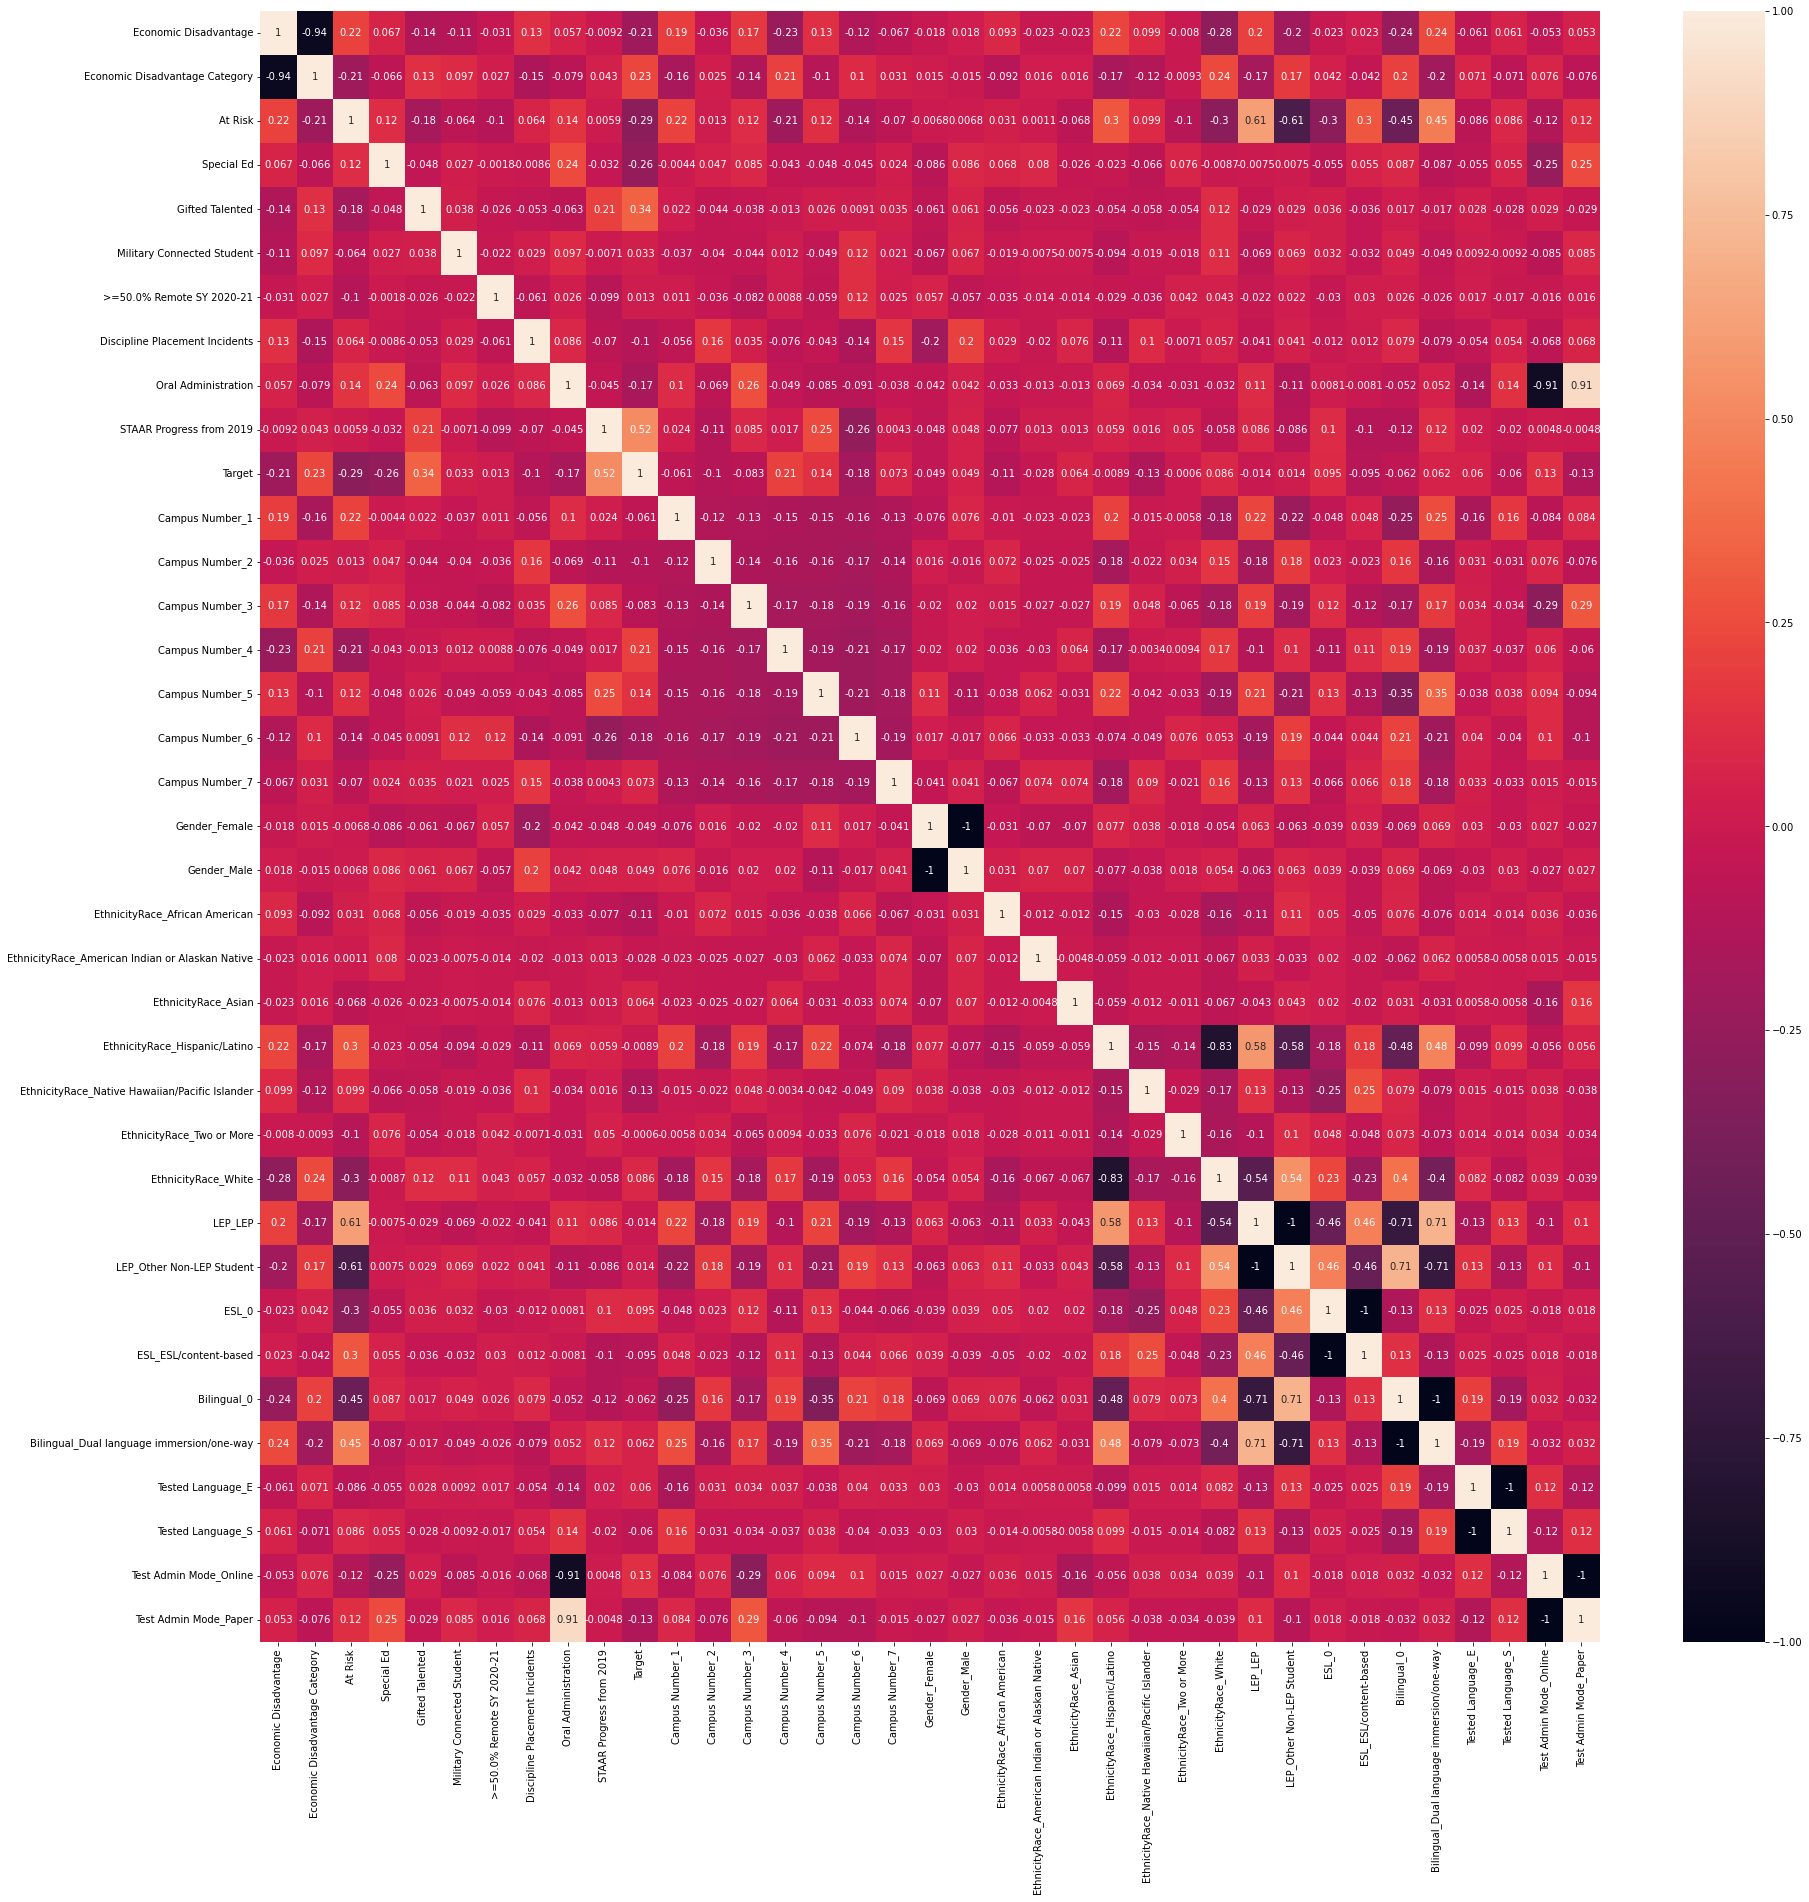

In [9]:
#Let me just double check that this is my strongest feature. Because I used Tableau for my EDA my process was somewhat different
plt.figure(figsize = (30, 30))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [10]:
#That's right, staar progress from 2019 was actually the strongest predictor, but this feature wasn't explored as much since 
#the association seemed obvious. However due to the business application, in this case the assistant superintendent wants
#an accurate method to predict staar achievement, this seems like the best feature to use as a baseline. I'll see if other 
#features can increase accuracy. 

In [17]:
#Building testing and training sets
X = df.drop(columns=['Target'])
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [18]:
Model = LogisticRegression()
Model.fit(X_train, y_train)
print(Model.score(X_train, y_train))

0.5680473372781065


C:\Users\Armstrongs\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


a. How would you rate your results with respect to your business goals: poor, just
OK, good, very good? Why?
-I would rate these results as 'just OK' bordering on 'poor'. An algorithm that predicts at with less than 60% accuracy would not be very helpful in determining where to direct resources.

b. Do you observe evidence of inherent issues with the dataset(s)? For instance: not
enough data, imbalanced data, noisy data, sparse data.
-This is a relitively small dataset with only categorical data. I initially hoped that I'd be able to have access to more data, but this is all I'm provided for this project. 

c. What metrics do you think are appropriate to focus on in connection with the
business problem? For instance, if you are solving a classification problem, you
might decide to optimize F-1 for a specific class (or all classes). If you are
solving a regression problem you might decide to optimize for MAPE. Discuss
with your mentor the various trade-offs and justifications that might be
associated with your specific project.
-I think f-1 score is definitely the most important metric for this business problem. Neither recall nor precision are as important as the overall accuracy for the success of this model. If I was going to optimize the f1 score for a particular class it might be those in the level 0 category for the target feature (Students who will fail the staar), however another possible avenue would be level 1 since it's easier to get an approaching student to pass than a failing student to approach. Due to the nature of the staar students moving from mid tiers to higher teirs are more valuable than moving from the bottom tiers to the mid tiers. Without getting into the details suffice it to say that for district scoring a student moving from meets to masters counts 3X as much for the district as a student moving from fails to approaches. Focusing on approaching students may provide the best value. 

d. What are the thresholds that can be considered to be acceptable in connection
with the business problem? Ask your mentor to play the role of the client to help
you frame your strategy by visualizing various scenarios.
-It's hard to pick a specific threshold. I would hazard to guess 70%, though the higher the accuracy the more effeciently resources could be directed. 

e. Consider how results will be communicated to your clients by using terms they
can understand and use for decision-making. For instance, if you are building
regression models, typically you would not communicate your results to your
client telling them the value of R-squared and RMSE of the model/s you built on
the test set. Instead you might want to communicate the worst upper-bound and
lower-bound of the predictions, which you can get by analyzing the distribution of
residuals associated with the test set.
-Noted
f. Note that special considerations must be made in the case of unsupervised
problems. Ask your mentor for guidance in this case.
-N/A
g. In collaboration with your mentor, build an extended modeling plan, which
specifies in what ways the baseline could be improved, in the context of the
business problem. This might require the identification and planning of how
various “dimensions” can be explored, combined, and attempted. Examples of
dimensions include, but are not limited to: feature engineering, hyper-parameter
tuning, algorithms, feature augmentation, feature selection, algorithm
ensembling, dataset augmentation, dataset resampling. You can explore the
dimension space by building a table with all dimensions and how they can be
combined. Once you have an idea of the dimension space, you can discuss with
your mentors what facets you will try and how you will keep track of the results
and document them. So, suppose you are considering 2 different algorithms, 2
approaches for feature engineering, and 5 approaches for resampling. This
means you would need to consider a total of 2 x 2 x 5 = 20 models! Therefore, it
makes sense to plan ahead of time whether the exploration will be conducted for
all the models, or for a subset of them (and for which subset).

h. Also in collaboration with your mentor, consider ways in which the baseline
results can be integrated in a larger workflow where the business problem exists.
This might touch on Tableau dashboards that you might have envisioned as part
of your project.